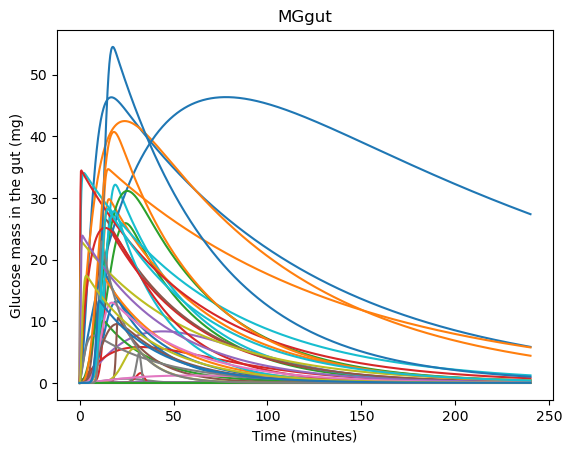

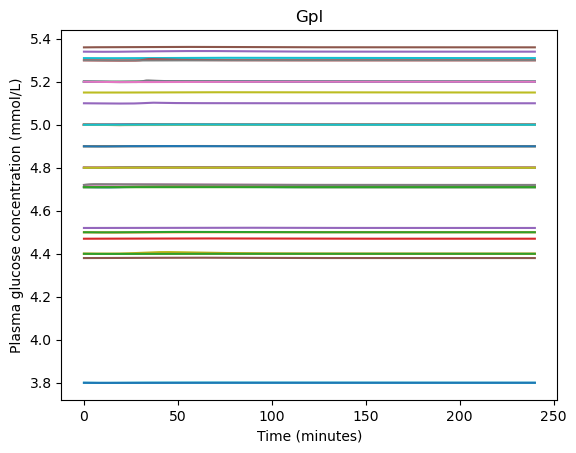

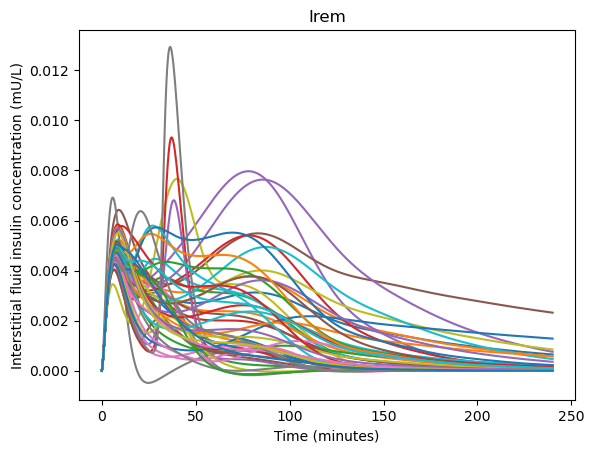

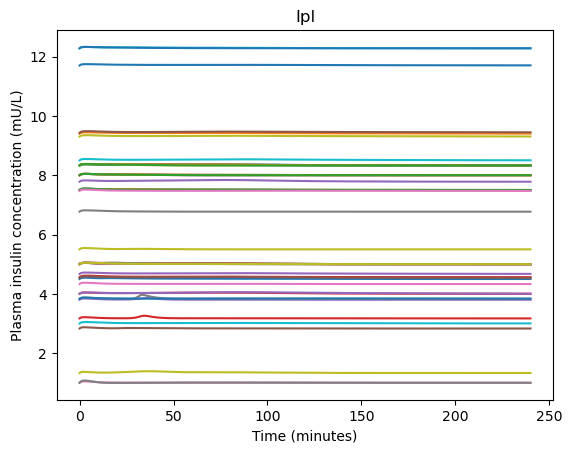

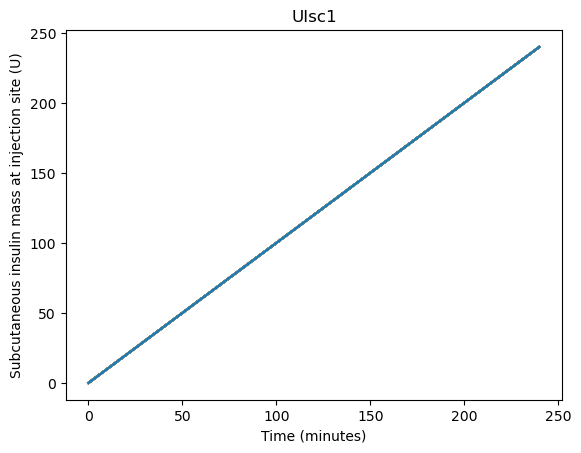

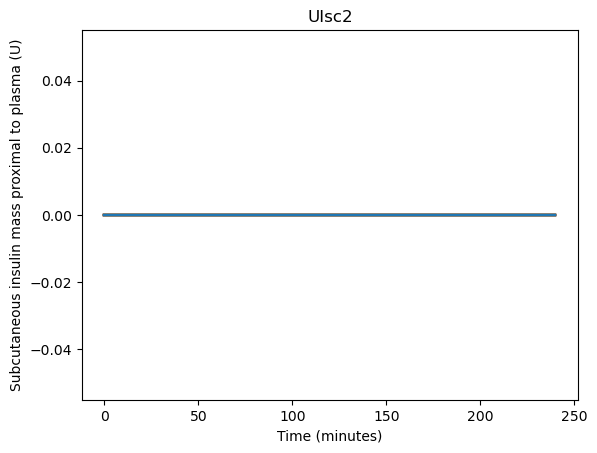

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import quad

#import constants
const = pd.read_excel('./1-s2.0-S2352939317300374-mmc2.xlsx')

glucose = pd.read_excel('./1-s2.0-S2352939317300374-mmc1.xlsx',sheet_name = 'glucose response data')
insulin = pd.read_excel('./1-s2.0-S2352939317300374-mmc1.xlsx',sheet_name = 'insulin response data')

#define the function
def dSdt(t, S):
    MGgut, Gpl, Irem, Ipl, UIsc1, UIsc2 = S
    mGpl = k2*MGgut
    ipl = k11 * (Ipl - Ibpl) 
    iit = k12 * Irem
    def integrand(t):
        return Gpl - Gbpl
    integral_term, error = quad(integrand, t_int, t)
    gliv = gbliv - k3*(Gpl - Gbpl) - k4*β*Irem
    ggut = k2 * f * MGgut/(vG* Mb)
    gnonit = gbliv * ((KM + Gbpl)/Gbpl) * (Gpl/(KM +Gpl))
    git = k5*β*Irem * Gpl/(KM + Gpl)
    if Gpl > Gthpl:
        gren = c1/(vG*Mb) * (Gpl-Gthpl)
    else:
        gren = 0
    dGpldt = gliv + ggut - gnonit - git - gren
    ipnc = (β**-1) * (k6*(Gpl - Gbpl) + (k7/τi) * integral_term + (k7/τi)*Gbpl + (k8*τd)*dGpldt)
    ila = h*(t_half**h)*(t**(h-1)) / ((t_half**h + t**h)**2 * vI * Mb) * Ula
    isa = k9 / (vI*Mb) * UIsc2
    iliv = k7 * Gbpl * Ipl / (β*τi*Ibpl)
    irem = k11 * (Ipl - Ibpl)
    mGgut = σ * (k1**σ) * (t**(σ-1)) * np.exp(-(k1 * t)**σ) * np.exp(-(k13 * t)) * Dmeal

    dMGgutdt = mGgut - mGpl
    dGpldt = gliv + ggut - gnonit - git - gren
    dIremdt = ipl-iit
    dIpldt = ipnc + isa + ila - iliv - irem
    dUIsc1dt = usa - k10 * UIsc1
    dUIsc2dt = k10 * UIsc1 - k9 * UIsc2

    return [dMGgutdt, dGpldt, dIremdt, dIpldt, dUIsc1dt, dUIsc2dt]
    
solution0 = []
solution1 = []
solution2 = []
solution3 = []
solution4 = []
solution5 = []

for i in range(51):
    #Parameters
    index = const.iloc[i,7] #study number
    k1 = const.iloc[i,2] #food related
    k2 = const.iloc[i,3] #food related
    k3 = 6.07e-3 #Zero for patients with diabetes type 1
    k4 = 2.35e-4 #Zero for patients with diabetes type 1
    k5 = 9.49e-2
    k6 = 1.93e-1
    k7 = 1.15
    k8 = 7.27
    k9 = 0 #Only for patients using short-acting insulin
    k10 = 0 #Only for patients using short-acting insulin
    k11 = 3.83e-2
    k12 = 2.84e-1
    k13 = const.iloc[i,4] #food related
    σ = const.iloc[i,5] #food related
    KM = 13.2

    #Input variables
    Dmeal = const.iloc[i,6] #food related
    Mb = 75 #body mass (kg)...not sure where to find actual value
    usa = 1 #not sure where to find actual values
    Ula = 1 #not sure where to find actual values

    #Constants
    Gbpl = np.array(glucose.iloc[3*index-2,4]) # this finds each study and returns Gbpl = Gpl(0)
    Ibpl = np.array(insulin.iloc[3*index-2,4]) # this finds each study and returns Ibpl = Ipl(0)
    gbliv = .043
    Gthpl = 9
    vG = 17/70
    vI = 13/70
    β = 1
    f = .005551
    τi = 31
    t_int = 30
    τd = 3
    c1 = .1
    h = 1 #differs by insulin brand
    t_half = 1 #differs by insulin brand
    a = 1 #differs by insulin brand
    b = 1 #differs by insulin brand

    #Variables
    t = np.linspace(0,240,1000)

    #initial conditions
    MGgut_0 = 0
    Gpl_0 = Gbpl
    Irem_0 = 0
    Ipl_0 = Ibpl
    UIsc1_0 = 0
    UIsc2_0 = 0

    S_0 = MGgut_0, Gpl_0, Irem_0, Ipl_0, UIsc1_0, UIsc2_0

    sol = odeint(dSdt, y0=S_0, t=t,tfirst = True)
    solution0.append(sol.T[0])
    solution1.append(sol.T[1])
    solution2.append(sol.T[2])
    solution3.append(sol.T[3])
    solution4.append(sol.T[4])
    solution5.append(sol.T[5])

#Plot the Solutions
for i in range(51):
    plot0 = plt.plot(t,solution0[i])
plt.xlabel('Time (minutes)')
plt.ylabel('Glucose mass in the gut (mg)')
plt.title('MGgut')
plt.show()

for i in range(51):
    plot1 = plt.plot(t,solution1[i])
plt.xlabel('Time (minutes)')
plt.ylabel('Plasma glucose concentration (mmol/L)')
plt.title('Gpl')
plt.show()

for i in range(51):
    plot2 = plt.plot(t,solution2[i])
plt.xlabel('Time (minutes)')
plt.ylabel('Interstitial fluid insulin concentration (mU/L)')
plt.title('Irem')
plt.show()

for i in range(51):
    plot3 = plt.plot(t,solution3[i])
plt.xlabel('Time (minutes)')
plt.ylabel('Plasma insulin concentration (mU/L)')
plt.title('Ipl')
plt.show()

for i in range(51):
    plot4 = plt.plot(t,solution4[i])
plt.xlabel('Time (minutes)')
plt.ylabel('Subcutaneous insulin mass at injection site (U)')
plt.title('UIsc1')
plt.show()

for i in range(51):
    plot5 = plt.plot(t,solution5[i])
plt.xlabel('Time (minutes)')
plt.ylabel('Subcutaneous insulin mass proximal to plasma (U)')
plt.title('UIsc2')
plt.show()